In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
survey_1 = [35,36,33,37,34,35]
np.mean(survey_1)

35.0

In [2]:
survey_2 = [20,37,17,50,33,53]

In [4]:
np.mean(survey_2)

35.0

# Bootstrapping

In [8]:
n=6
bootstrapped_samples = np.random.choice(survey_1,size = n)
bootstrapped_samples

array([35, 34, 35, 35, 36, 35])

<Axes: ylabel='Count'>

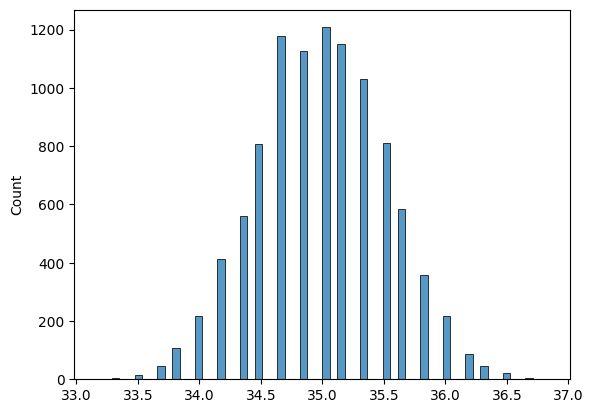

In [9]:
bootstrapped_means_survey_1 = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_1,size = n)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_1.append(bootstrapped_mean)
    
sns.histplot(bootstrapped_means_survey_1)

In [10]:
# Same code with survey_2

In [11]:
n=6
bootstrapped_samples = np.random.choice(survey_2,size = n)
bootstrapped_samples

array([37, 53, 20, 33, 37, 17])

<Axes: ylabel='Count'>

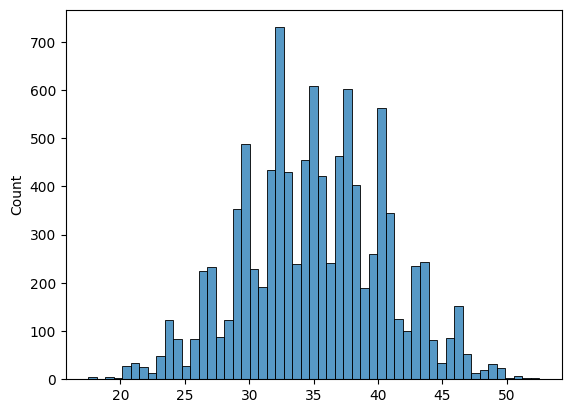

In [12]:
bootstrapped_means_survey_2 = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_2,size = n)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_2.append(bootstrapped_mean)
    
sns.histplot(bootstrapped_means_survey_2)

In [17]:
np.std(survey_1)

1.2909944487358056

In [19]:
np.std(survey_2)

13.576941236277534

In [20]:
# clearly we will trust survey_1, because it has very low variation

# Confidence Interval 95%

In [21]:
np.percentile(bootstrapped_means_survey_1,[2.5,97.5])

array([34., 36.])

In [22]:
np.percentile(bootstrapped_means_survey_2,[2.5,97.5])

array([24., 46.])

# Central Limit Theorem

In [24]:
sachin = pd.read_csv('C:/Users/htc/Downloads/Sachin_ODI.csv')

In [29]:
sachin.shape

(360, 14)

In [27]:
sachin['runs'].describe()

count    360.000000
mean      43.241667
std       42.182452
min        0.000000
25%        8.000000
50%       30.000000
75%       67.000000
max      200.000000
Name: runs, dtype: float64

In [28]:
num_samples = 100
sachin['runs'].sample(num_samples).mean()

44.61

# Sample mean Trend

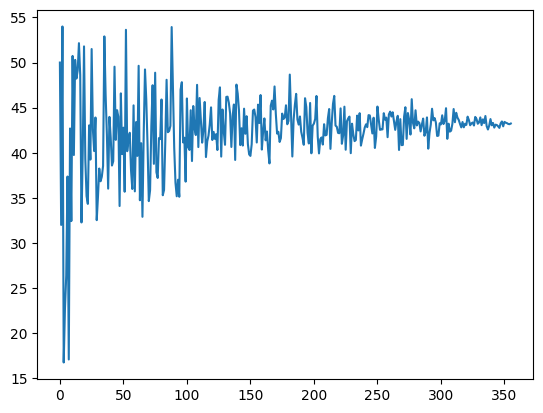

In [30]:
sample_mean_trend = []
for num_samples in range(5,361):
    sample = sachin['runs'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_mean_trend.append(sample_mean)
    
plt.plot(sample_mean_trend)

In [ ]:
# Fluctuations are very high in starting, but very low in the end.
# Almost converged to the population mean

Text(0, 0.5, 'Sample mean')

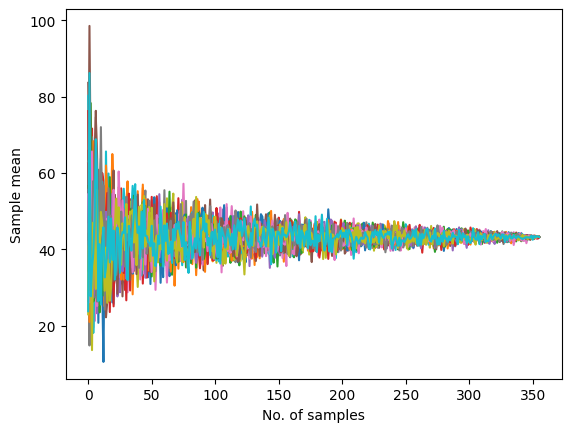

In [31]:
sample_mean_trend = []
for person in range(20):
    
    for num_samples in range(5,361):
        sample = sachin['runs'].sample(num_samples)
        sample_mean = np.mean(sample)
        sample_mean_trend.append(sample_mean)
    
    plt.plot(sample_mean_trend)
    sample_mean_trend = [] # next person starts afresh
plt.xlabel('No. of samples')
plt.ylabel('Sample mean')

<Axes: ylabel='Count'>

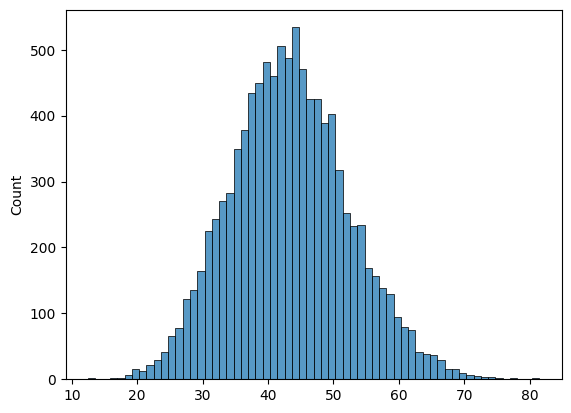

In [37]:

num_samples = 20
collect_sample_means_1 = []
for person in range(10000):
    sample_mean = sachin['runs'].sample(num_samples).mean()
    collect_sample_means_1.append(sample_mean)
sns.histplot(collect_sample_means_1)

###  This is nothing but a cross-section of upper code
### Looks almost Gaussian (20,70) 95% C.I
### if we change the sample size to a bigger number, the variation will be low and more accurate.

<Axes: ylabel='Count'>

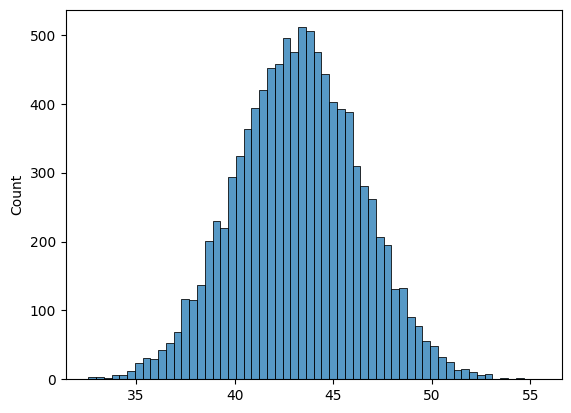

In [46]:
num_samples = 120
collect_sample_means = []
for person in range(10000):
    sample_mean = sachin['runs'].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

In [47]:
sachin['runs'].std()

42.18245206052441

In [48]:
np.std(collect_sample_means_1)

9.042862659079535

In [49]:
np.std(collect_sample_means)

3.1470517261477142

In [50]:
std1 = 42.18/math.sqrt(20)
std1

9.431734729094112

In [51]:
import math

In [52]:
std = 42.18/math.sqrt(120)
std

3.8504895792613176

In [54]:
math.sqrt(30)

5.477225575051661